# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [5]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



### 之前做過的處理

In [6]:

%matplotlib inline


# 設定 data_path
dir_data = 'D:/GitHub/Data/Data1'

f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
##app_train.head()
app_train.shape

Path of read in data: D:/GitHub/Data/Data1\application_train.csv


(307511, 122)

In [7]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


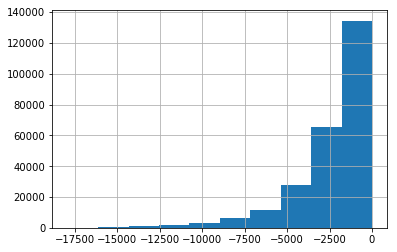

In [16]:
##員工到職天數
##用nan去把極直取代掉

app_train['DAYS_EMPLOYED'].describe()

# 這邊我們用 nan 將異常值取代
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

(app_train['DAYS_EMPLOYED']).hist()

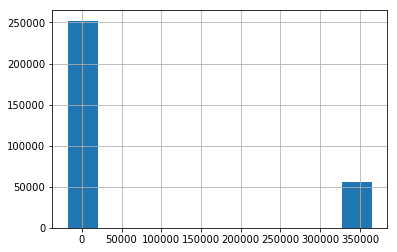

In [13]:
(app_train['DAYS_EMPLOYED']).hist()

In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [17]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
### 極值取代

app_train['AMT_INCOME_TOTAL'].describe()
app_train['AMT_INCOME_TOTAL'].max()

app_train['AMT_INCOME_TOTAL_ANOM'] = app_train["DAYS_EMPLOYED"] == (117000000.0 or 13500000.0 or 9000000.0 or 6750000.0 or 18000090.0)
app_train['AMT_INCOME_TOTAL'].replace({117000000.0: np.nan}, inplace = True)
app_train['AMT_INCOME_TOTAL'].replace({13500000.0: np.nan}, inplace = True)
app_train['AMT_INCOME_TOTAL'].replace({9000000.0: np.nan}, inplace = True)
app_train['AMT_INCOME_TOTAL'].replace({6750000.0: np.nan}, inplace = True)
app_train['AMT_INCOME_TOTAL'].replace({18000090.0: np.nan}, inplace = True)

app_train['AMT_INCOME_TOTAL'].sort_values(ascending=False)[0:100]



103006    4500000.0
204564    4500000.0
187833    4500000.0
287463    4500000.0
181698    3950059.5
20216     3825000.0
284311    3600000.0
49645     3600000.0
82846     3375000.0
86026     3375000.0
101007    3150000.0
248159    3150000.0
107926    2930026.5
258773    2700000.0
298082    2475000.0
278212    2250000.0
201855    2250000.0
195807    2250000.0
55329     2250000.0
74781     2250000.0
294892    2250000.0
145673    2250000.0
10222     2250000.0
71637     2250000.0
158338    2250000.0
29737     2250000.0
81185     2250000.0
206814    2250000.0
98243     2214117.0
115016    2160000.0
            ...    
167656    1575000.0
90064     1575000.0
293342    1575000.0
300468    1575000.0
268769    1575000.0
110569    1575000.0
203682    1575000.0
67822     1575000.0
44571     1530000.0
91878     1440000.0
186708    1440000.0
268444    1417500.0
256121    1381500.0
57649     1358550.0
157994    1350000.0
109209    1350000.0
213346    1350000.0
240036    1350000.0
196106    1350000.0


== Original AMT_INCOME_TOTAL range ==
count    3.075060e+05
mean     1.682665e+05
std      9.916463e+04
min      2.565000e+04
25%      1.125000e+05
50%      1.470735e+05
75%      2.025000e+05
max      4.500000e+06
Name: AMT_INCOME_TOTAL, dtype: float64
== Normalized data range ==


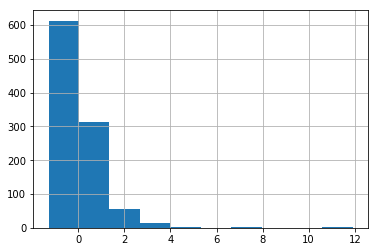

In [89]:
# Zscore : y = (x-mean(x))/std(x)
 
print("== Original AMT_INCOME_TOTAL range ==")
print(app_train['AMT_INCOME_TOTAL'].describe())

def normalize_value(x):
    AmountSTD = app_train['AMT_INCOME_TOTAL'].std()
    AmountMean = app_train['AMT_INCOME_TOTAL'].mean()
    x = (x-AmountMean)/(AmountSTD) 
    
    return x

app_train['AMT_INCOME_TOTAL_NORMALIZED'] = normalize_value(app_train['AMT_INCOME_TOTAL'])

print("== Normalized data range ==")
app_train['AMT_INCOME_TOTAL_NORMALIZED'].describe()
app_train['AMT_INCOME_TOTAL_NORMALIZED'].sample(n=1000).hist()